<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/fastquant/SMAeRSIEthDaytraderMay2021aDezembro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtest usando fastquant

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 1.2 MB/s 
     |████████████████████████████████| 156 kB 49.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.4 MB/s 
     |████████████████████████████████| 2.2 MB 23.3 MB/s 
     |████████████████████████████████| 503 kB 46.1 MB/s 
     |████████████████████████████████| 410 kB 53.1 MB/s 
     |████████████████████████████████| 138 kB 49.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 191 kB 36.6 MB/s 
     |████████████████████████████████| 6.3 MB 13.9 MB/s 
     |████████████████████████████████| 843 kB 42.3 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 3.6 MB 14.2 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 160 kB 47.0 MB/s 
     |████████████████████████████████| 291 kB 52.0 MB/s 
     |████████████████████████████████| 192 kB 52.9 MB/s 
     |███████████

#Pega dados da Binance

In [96]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("ETH/USDT", 
                         "2021-05-15", 
                         "2021-12-10",
                         time_resolution='1d'
                        )

In [97]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-12-06,4196.44,4376.15,3921.00,4347.59,726742.9638
2021-12-07,4347.57,4425.00,4255.92,4306.40,420749.7510
2021-12-08,4306.40,4450.49,4222.95,4436.91,429403.9351
2021-12-09,4436.91,4488.00,4076.16,4105.64,462173.7110
2021-12-10,4105.64,4231.08,3887.37,3897.94,563236.5671


#Executando Backtesting com conjunto de valores

In [98]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [99]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,0.409854,0.001952,0.635298,63.529758,32,14.370616,25284.24,"{'len': 57, 'drawdown': 29.562491473234523, 'm...",29.562491,57,None,50659.78,150659.78,2,1.0,2.0,0.0,25329.89,25.32989,0.000000,0.000000,31552.78,31.55278,0.00,0.00000
1,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,75,0.397510,0.001893,0.611254,61.125372,32,18.856504,34581.52,"{'len': 44, 'drawdown': 29.570180927764923, 'm...",29.570181,44,None,48811.54,148811.54,2,0.5,1.0,0.0,34270.08,34.27008,0.000000,0.000000,34270.08,34.27008,0.00,0.00000
2,12,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,0.386223,0.001839,0.589576,58.957625,96,14.755611,25469.82,"{'len': 96, 'drawdown': 30.6551120588551, 'mon...",30.655112,96,None,47141.26,147141.26,6,0.5,3.0,3.0,22552.93,22.55293,-6839.176667,-6.839177,28240.30,28.24030,-13127.94,-13.12794
3,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,0.340819,0.001623,0.505286,50.528620,32,10.458341,16423.04,"{'len': 53, 'drawdown': 21.509027263790127, 'm...",21.509027,53,None,40609.90,140609.90,4,0.5,2.0,2.0,30217.32,30.21732,-9912.370000,-9.912370,35490.96,35.49096,-16186.06,-16.18606
4,13,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,45,0.326220,0.001553,0.479144,47.914443,96,13.142350,20967.20,"{'len': 96, 'drawdown': 29.69527238446727, 'mo...",29.695272,96,None,38572.00,138572.00,2,1.0,2.0,0.0,19286.00,19.28600,0.000000,0.000000,33924.00,33.92400,0.00,0.00000


In [100]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 60)

#Roda o Backtest usando os valores ótimos encontrados anteriormente

In [101]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

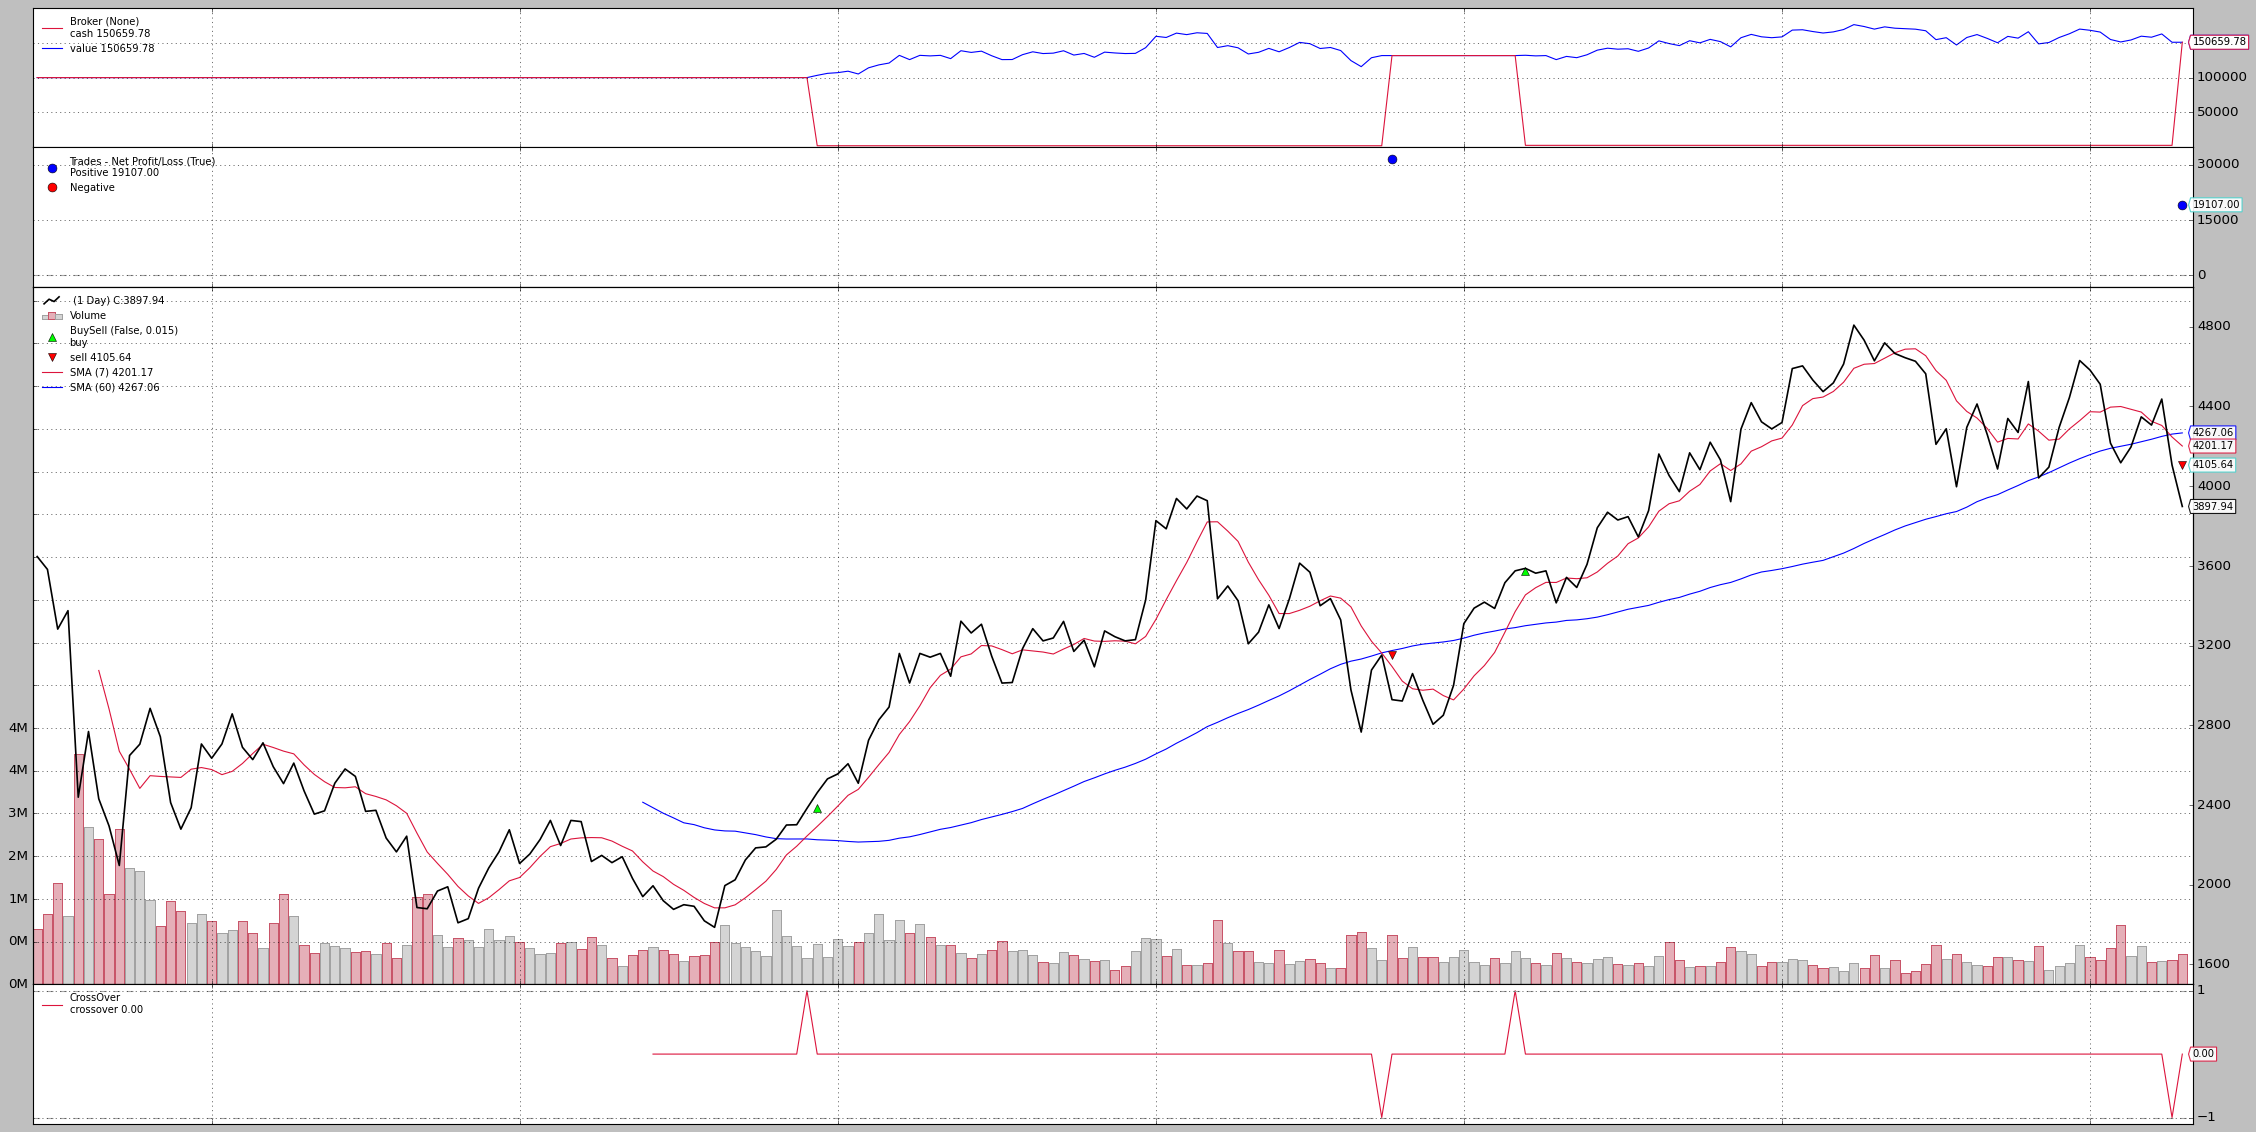

In [102]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

#Acessando histórico de transações
Isso é feito definindo return_history = True.

##Estratégia Simples

In [103]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [104]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,0.409854,0.001952,0.635298,63.529758,32,14.370616,25284.24,"{'len': 57, 'drawdown': 29.562491473234523, 'm...",29.562491,57,None,50659.78,150659.78,2,1.0,2,0,25329.89,25.32989,0.0,0.0,31552.78,31.55278,0.0,0.0


 melhor ROI é de 50,66%

In [105]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [110]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period7_slow_period60,2021-07-30,buy,2382.92,41,97699.72,0.0,0.00
1,0,fast_period7_slow_period60,2021-09-24,sell,3152.50,-41,97699.72,0.0,31552.78
2,0,fast_period7_slow_period60,2021-10-07,buy,3574.89,36,128696.04,0.0,0.00
3,0,fast_period7_slow_period60,2021-12-10,sell,4105.64,-36,128696.04,0.0,19107.00


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:

In [111]:
r = results.squeeze()
r.final_value

150659.78000000003

In [112]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

150659.78000000003

# estratégia de sinal único com pesquisa de grade

In [113]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [114]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

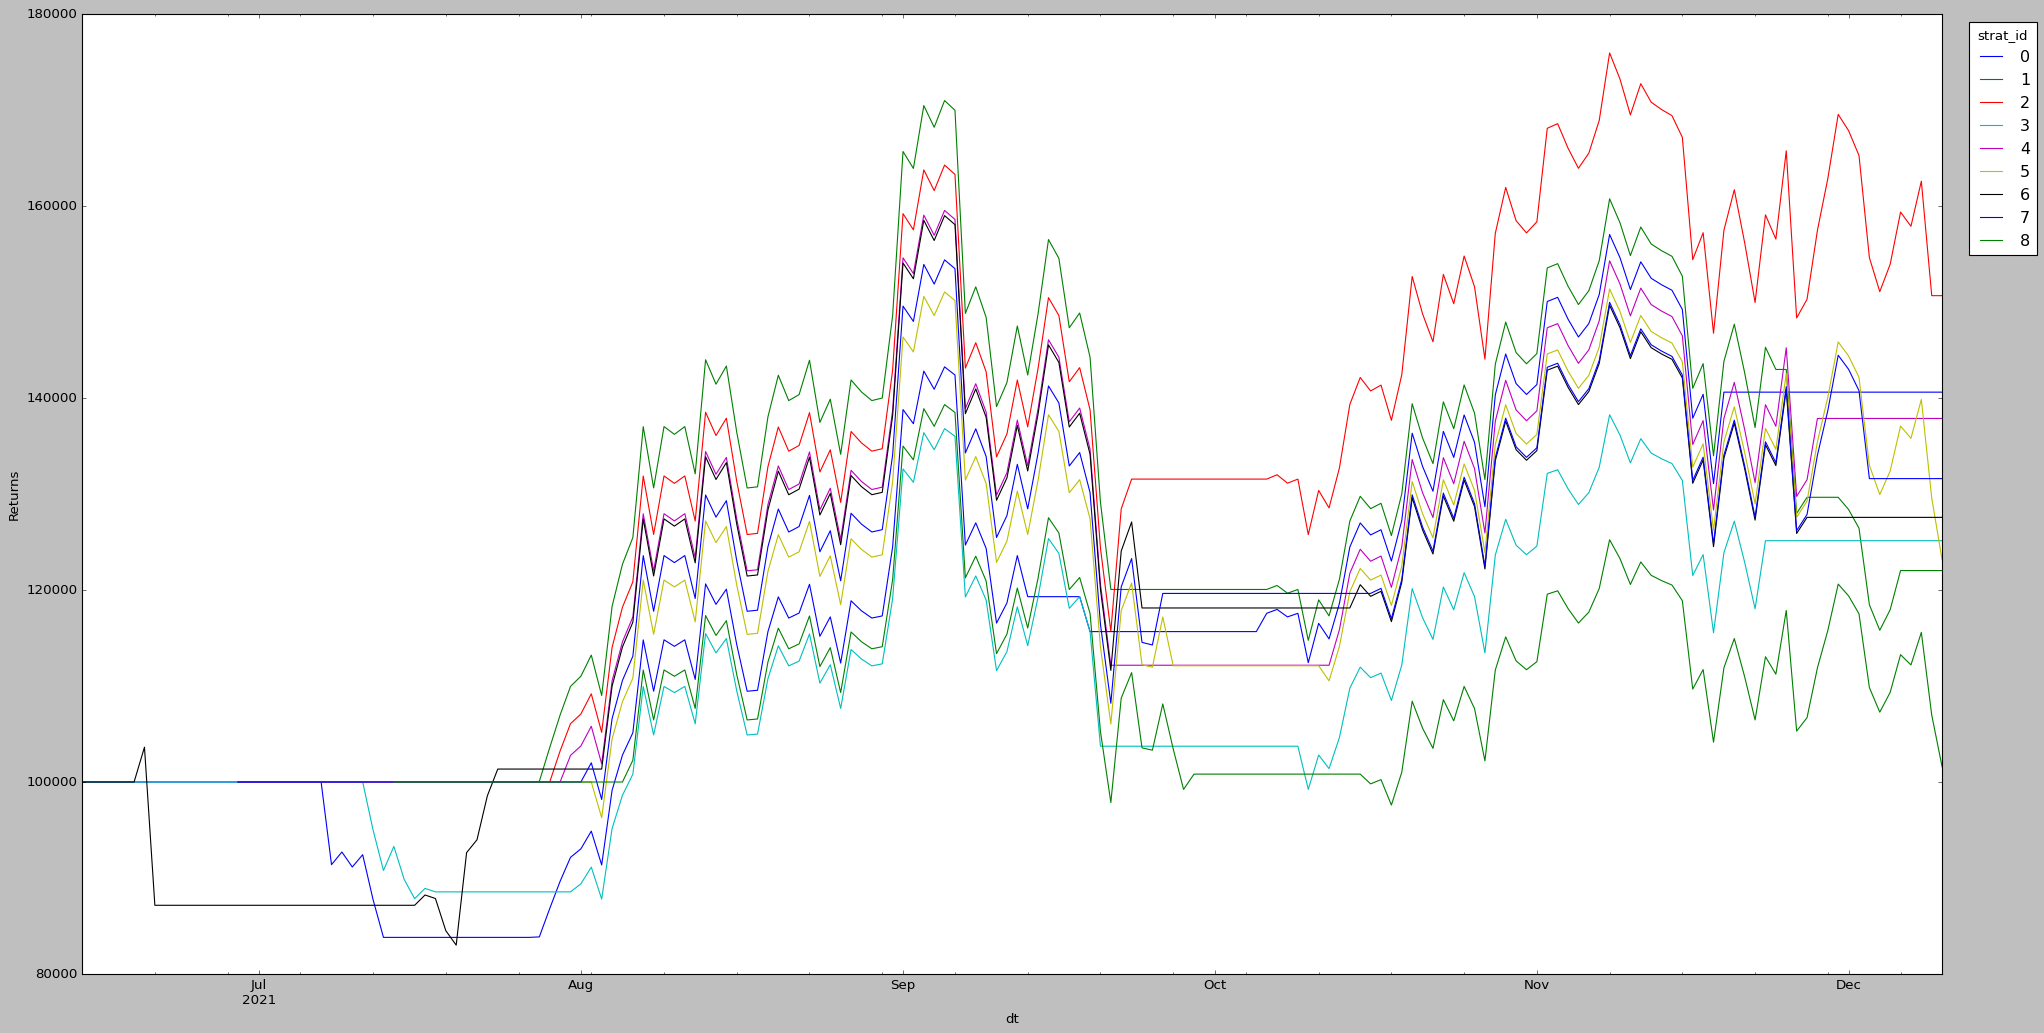

In [115]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

# Estratégia multi sinal

In [116]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2021-07-29T00:00:00, BUY CREATE, 2382.92
2021-07-29T00:00:00, Cash: 100000.0
2021-07-29T00:00:00, Price: 2382.92
2021-07-29T00:00:00, Buy prop size: 41.923396463204774
2021-07-29T00:00:00, Afforded size: 41.923396463204774
2021-07-29T00:00:00, Final siz

In [117]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.223998,0.001067,0.308391,30.839103,32,14.414158,21070.2,"{'len': 32, 'drawdown': 16.645834631701227, 'm...",16.645835,32,None,25106.91,125106.91,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ROI de 25%

In [118]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [119]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-12-10T00:00:00, ===Global level arguments===
2021-12-10T00:00:00, init_cash : 100000
2021-12-10T00:00:00, buy_prop : 1
2021-12-10T00:00:00, sell_prop : 1
2021-12-10T00:00:00, commission : 0
2021-12-10T00:00:00, stop_loss : 0
2021-12-10T00:00:00, stop_trail : 0
2021-12-10T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2021-07-07T00:00:00, BUY CREATE, 2316.57
2021-07-07T00:00:00, Cash: 100000.0
2021-07-07T00:00:00, Price: 2316.57
2021-07-07T00:00:00, Buy prop size: 43.12414470536176
2021-07-07T00:00:00, Afforded size: 43.12414470536176
2021-07-07T00:00:00, Final size:

In [120]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

In [121]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.411977,0.001962,0.639469,63.946923,32,14.344510,25284.24,"{'len': 32, 'drawdown': 16.565402974840673, 'm...",16.565403,32,None,50979.99,150979.99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.411977,0.001962,0.639469,63.946923,32,14.344510,25284.24,"{'len': 32, 'drawdown': 16.565402974840673, 'm...",16.565403,32,None,50979.99,150979.99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.303329,0.001444,0.439067,43.906663,32,10.512230,15909.82,"{'len': 67, 'drawdown': 16.613264681724576, 'm...",16.613265,67,None,35435.99,135435.99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.303329,0.001444,0.439067,43.906663,32,10.512230,15909.82,"{'len': 67, 'drawdown': 16.613264681724576, 'm...",16.613265,67,None,35435.99,135435.99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.286128,0.001363,0.409668,40.966758,32,18.858900,30941.36,"{'len': 32, 'drawdown': 18.858900180705906, 'm...",18.858900,32,None,33126.32,133126.32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.286128,0.001363,0.409668,40.966758,32,18.858900,30941.36,"{'len': 32, 'drawdown': 18.858900180705906, 'm...",18.858900,32,None,33126.32,133126.32,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.284338,0.001354,0.406642,40.664214,32,9.565660,14056.20,"{'len': 32, 'drawdown': 16.55891841525345, 'mo...",16.558918,32,None,32888.18,132888.18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.284338,0.001354,0.406642,40.664214,32,9.565660,14056.20,"{'len': 32, 'drawdown': 16.55891841525345, 'mo...",16.558918,32,None,32888.18,132888.18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.223998,0.001067,0.308391,30.839103,32,14.414158,21070.20,"{'len': 32, 'drawdown': 16.645834631701227, 'm...",16.645835,32,None,25106.91,125106.91,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.223998,0.001067,0.308391,30.839103,32,14.414158,21070.20,"{'len': 32, 'drawdown': 16.645834631701227, 'm...",16.645835,32,None,25106.91,125106.91,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Melhor ROI foi 50%